<h1 style="color: red;  text-align: center;"> Customer Churn Prediction Telco </h1>

***********

**Problem**
- Il est demandé de développer un modèle d’apprentissage automatique pour prédire les clients susceptibles de quitter l’entreprise.
- Avant de construire le modèle, il est prévu que les étapes nécessaires d’analyse des données et  Ingénierie des caractéristiques(Features engineering) soient terminées.

**Information**
- Il comprend des informations sur les clients qui sont restés, sont partis ou se sont inscrits au service.
- 21 variables et 7 043 observations

**Features**
- <u>CustomerID</u> : ID client
- <u>Gender</u> : sexe du client
- <u>SeniorCitizen</u> : si le client est une personne âgée (1, 0)
- <u>Partner</u> : Si le client a un partenaire (Oui, Non) — indique l'état matrimonial
- <u>Dependents</u> : si le client a des personnes à charge (oui, non) — comme des enfants, des parents ou des grands-parents
- <u>Tenure</u> : nombre de mois d’abonnement du client 
- <u>PhoneService</u> : si le client a un service téléphonique (Yes/No 
- <u>MultipleLines</u> : si le client a plusieurs lignes (Yes/No/No phone service)
- <u>InternetService</u> : type d’abonnement internet (DSL/Fiber optic/No)
- <u>OnlineSecurity</u> : option sécurité en ligne (Yes/No/No internet service)
- <u>OnlineBackup</u> : option sauvegarde en ligne (Yes/No/No internet service)
- <u>DeviceProtection</u> : option protection des appareils (Yes/No/No internet service)
- <u>TechSupport</u> : option support technique (Yes/No/No internet service)
- <u>StreamingTV</u> : accès au service de TV en streaming (Yes/No/No internet service)
- <u>StreamingMovies</u> : accès au service de films en streaming (Yes/No/No internet service)
- <u>Contract</u> : type de contrat (Month-to-month/One year/Two year)
- <u>PaperlessBilling</u> : facturation sans papier (Yes/No)
- <u>PaymentMethod</u> : mode de paiement (Electronic check/Mailed check/Bank transfer/Credit card)
- <u>MonthlyCharges</u> : montant mensuel payé par le client
- <u>TotalCharges</u> : montant total payé par le client
- <u>Churn</u> : variable cible, indique si le client a résilié son contrat (Yes/No)


**Remarques :**¶
- Chaque ligne représente un client unique.

- Les variables incluent des informations sur le service client, les informations sur le compte et des données démographiques.

- Service client : téléphone, lignes multiples, internet, sécurité en ligne, sauvegarde en ligne, protection des appareils, assistance technique, streaming TV et films.

- Informations sur le compte client : ancienneté, contrat, mode de paiement, facturation électronique, frais mensuels et total des frais.

- Informations démographiques du client : sexe, tranche d'âge et présence ou non d'un partenaire ou de personnes à charge.

In [1]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1) Exploratory data analysis (EDA)

In [4]:
print("##################### Shape #####################")
print(df.shape)
print("##################### Types #####################")
print(df.dtypes)
print("##################### NA #####################")
print(df.isnull().sum())
print("##################### Quantiles #####################")
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T


##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
##################### NA #####################
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.0,1.000,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,0.00,1.00,29.00,72.0,72.000,72.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,18.25,19.65,70.35,107.4,114.729,118.75,118.75


In [5]:
# Nous devons changer le type des variables TotalCharges et churn
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 1.1) Détermination des variables numériques et catégorielles

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numerical, and categorical but cardinal variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which the variable names are to be retrieved
        cat_th: int, optional
                Class threshold value for numerical but categorical variables
        car_th: int, optional
                Class threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                List of categorical variables
        num_cols: list
                List of numerical variables
        cat_but_car: list
                List of categorical-looking but cardinal variables

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is included in cat_cols.
    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

print("************ Categorical Variables ************  ")
pprint(cat_cols)
print("************ Numerical Variables ************")
pprint(num_cols)
print("************ Categorical but Cardinal Variables ************")
pprint(cat_but_car)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2
************ Categorical Variables ************  
['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Churn']
************ Numerical Variables ************
['tenure', 'MonthlyCharges', 'TotalCharges']
************ Categorical but Cardinal Variables ************
['customerID']


### 1.2 Analyse des variables catégorielle

        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435
##########################################


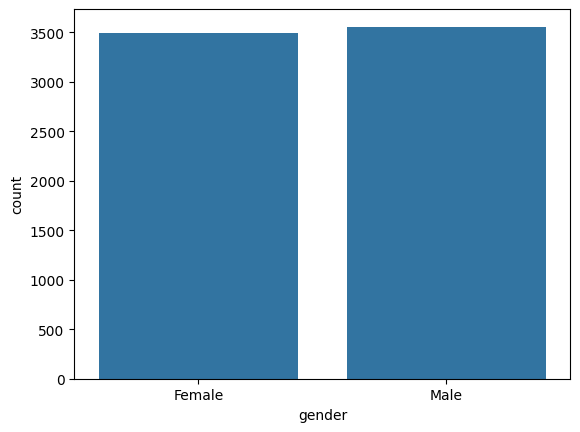

         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328
##########################################


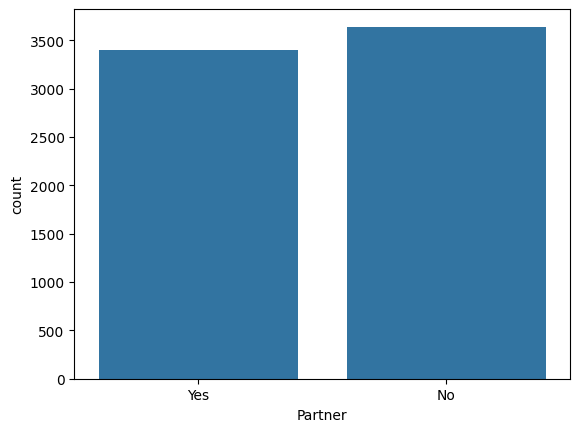

            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824
##########################################


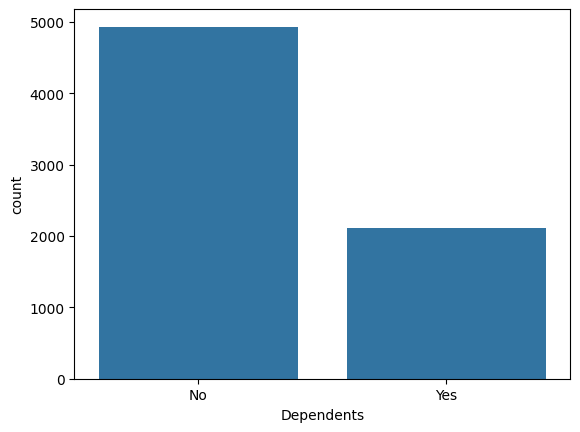

              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374
##########################################


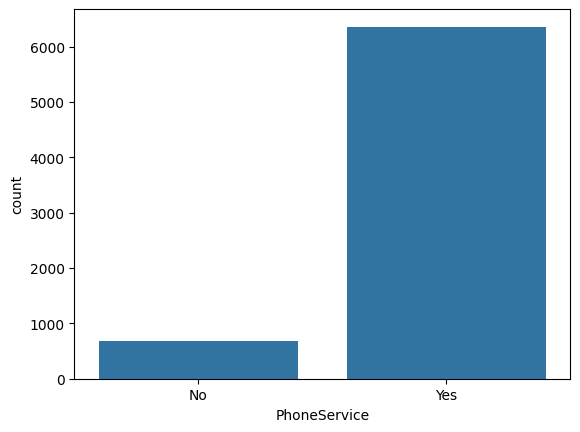

                  MultipleLines      Ratio
MultipleLines                             
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
##########################################


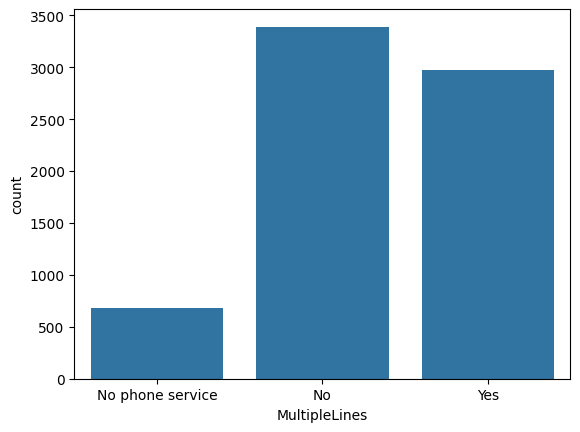

                 InternetService      Ratio
InternetService                            
Fiber optic                 3096  43.958540
DSL                         2421  34.374556
No                          1526  21.666903
##########################################


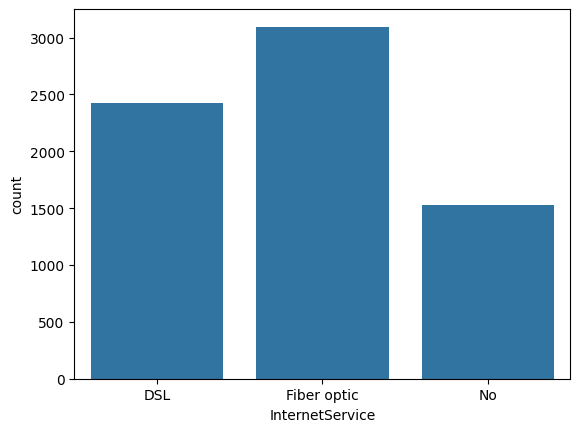

                     OnlineSecurity      Ratio
OnlineSecurity                                
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903
##########################################


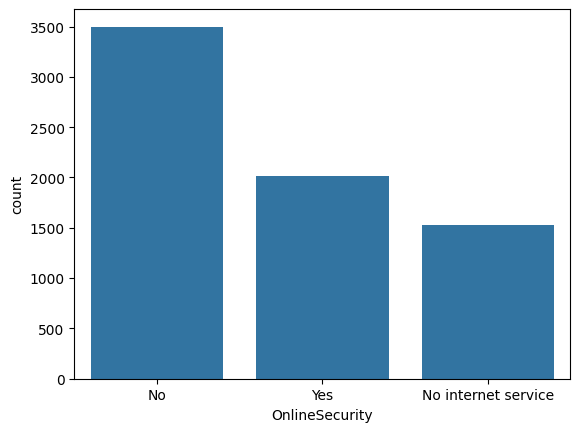

                     OnlineBackup      Ratio
OnlineBackup                                
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903
##########################################


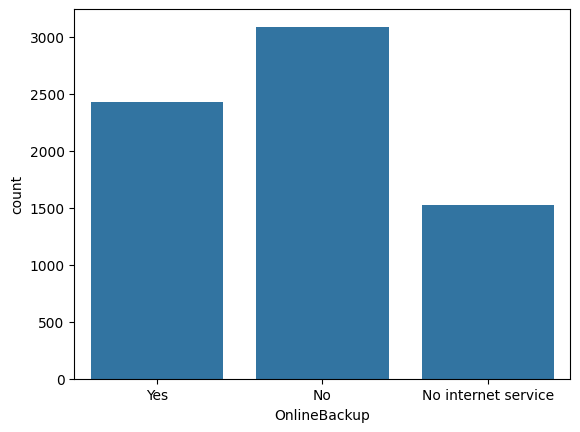

                     DeviceProtection      Ratio
DeviceProtection                                
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903
##########################################


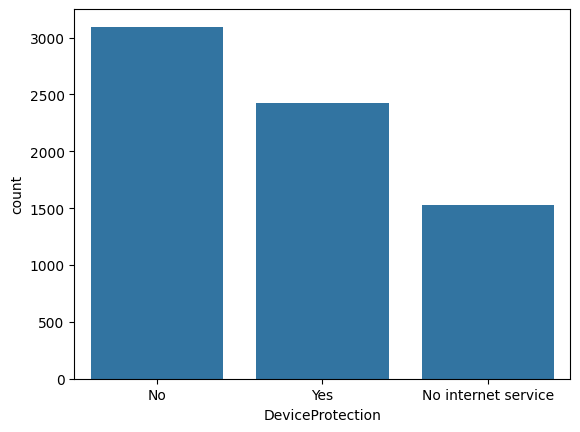

                     TechSupport      Ratio
TechSupport                                
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903
##########################################


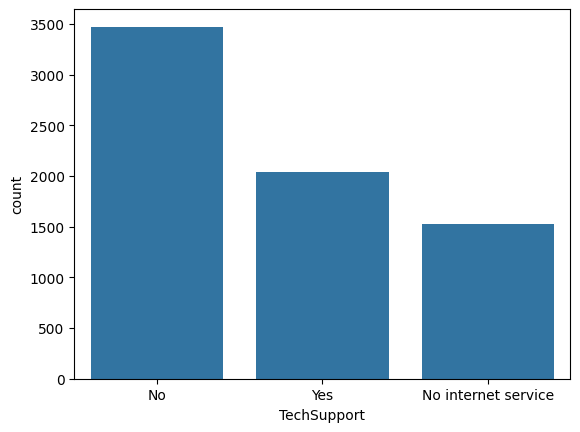

                     StreamingTV      Ratio
StreamingTV                                
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903
##########################################


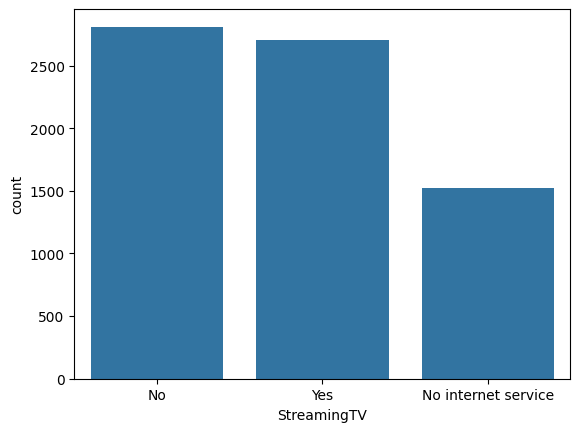

                     StreamingMovies      Ratio
StreamingMovies                                
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903
##########################################


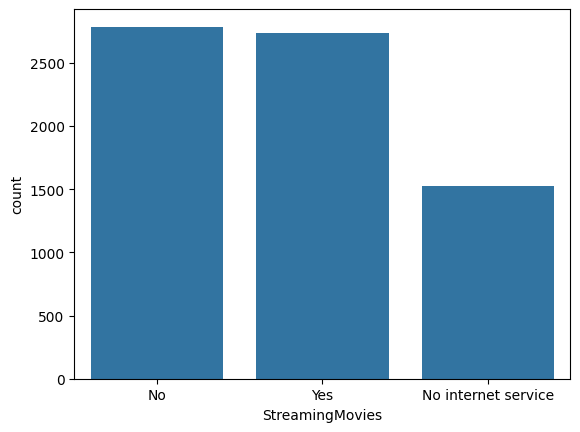

                Contract      Ratio
Contract                           
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383
##########################################


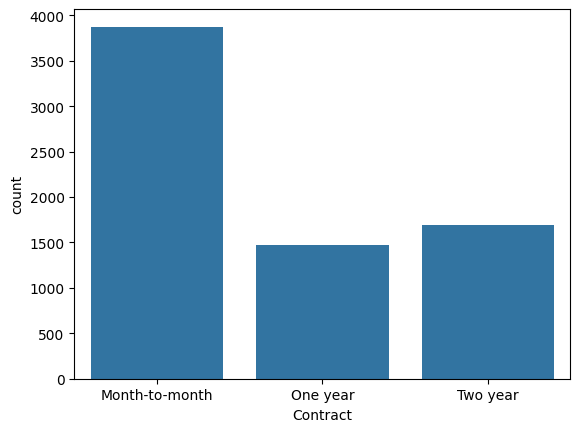

                  PaperlessBilling      Ratio
PaperlessBilling                             
Yes                           4171  59.221922
No                            2872  40.778078
##########################################


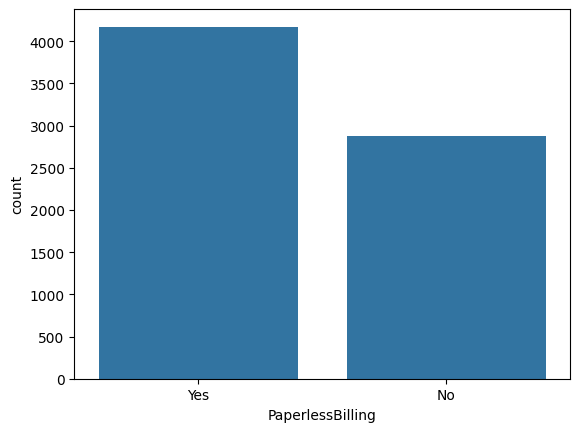

                           PaymentMethod      Ratio
PaymentMethod                                      
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109
##########################################


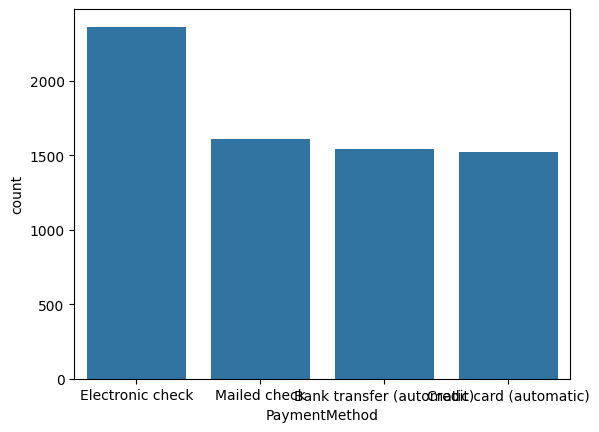

               SeniorCitizen      Ratio
SeniorCitizen                          
0                       5901  83.785319
1                       1142  16.214681
##########################################


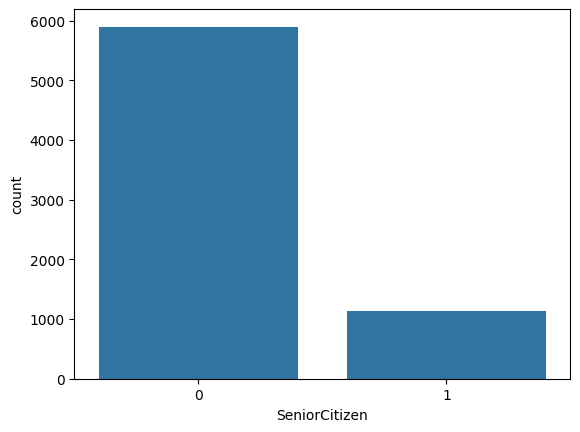

       Churn      Ratio
Churn                  
0       5174  73.463013
1       1869  26.536987
##########################################


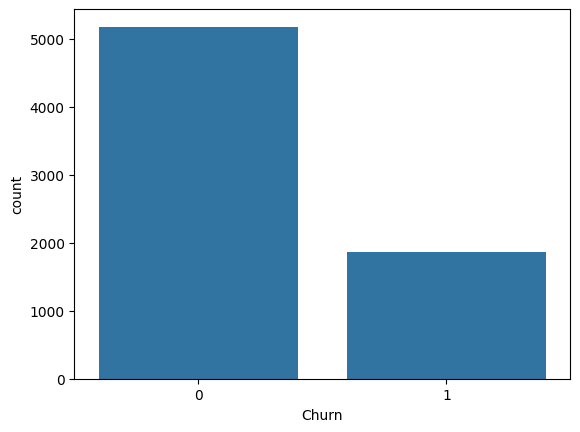

In [7]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)

### 1.4) Analyse et variable numérique

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


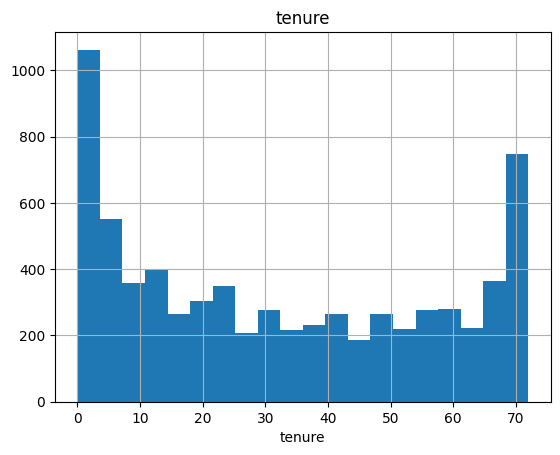

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


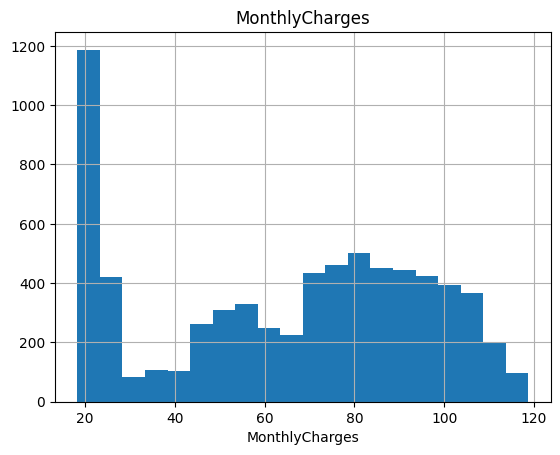

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


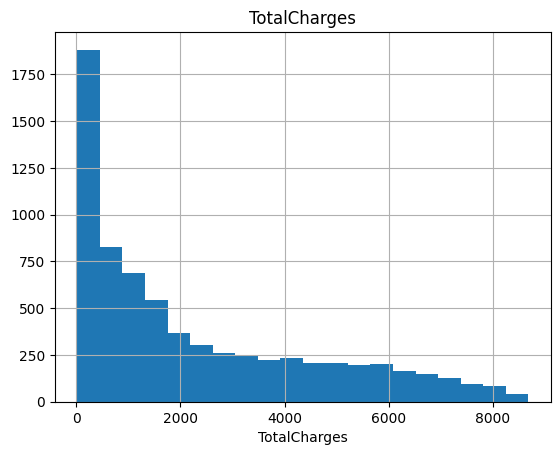

In [8]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

##  2. FEATURE ENGINEERING

### 2.1 ANALYSE DES VALEURS MANQUANTES¶

In [9]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

              n_miss  ratio
TotalCharges      11   0.16


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

y = dff["Churn"]
X = dff.drop(["Churn","customerID"], axis=1)

In [12]:
X

,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,1,29.85,29.85,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,45,42.30,1840.75,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,True,True,True,True,False,True,False,...,True,False,True,True,False,True,False,False,True,False
7039,72,103.20,7362.90,False,True,True,True,False,True,True,...,True,False,True,True,False,True,True,False,False,False
7040,11,29.60,346.45,False,True,True,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
7041,4,74.40,306.60,True,True,False,True,False,True,True,...,False,False,False,False,False,True,False,False,True,True


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistique Regression 

In [16]:
# Initialiser et entraîner le modèle de régression logistique
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

# Faire des prédictions et évaluer la performance
y_pred_logreg = logreg.predict(X_test)

# Calcul des métriques
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

print(f"Régression Logistique - Accuracy: {accuracy_logreg * 100:.2f}%")
print(f"Régression Logistique - Precision: {precision_logreg * 100:.2f}%")
print(f"Régression Logistique - Recall: {recall_logreg * 100:.2f}%")
print(f"Régression Logistique - F1-Score: {f1_logreg * 100:.2f}%")

Régression Logistique - Accuracy: 82.04%
Régression Logistique - Precision: 81.43%
Régression Logistique - Recall: 82.04%
Régression Logistique - F1-Score: 81.62%


### K-NN (K plus proches voisins )

In [17]:
#Test k from 1 to 20
neighbors = np.arange(1,21)
test_accuracy = np.empty(len(neighbors))
Max  = 0
K=0
for i,k in enumerate (neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    if(knn.score(X_test, y_test) > Max):
        Max = knn.score(X_test, y_test)
        K = k
    test_accuracy[i] = knn.score(X_test, y_test)

  File "C:\Users\omar\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\omar\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\omar\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\omar\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


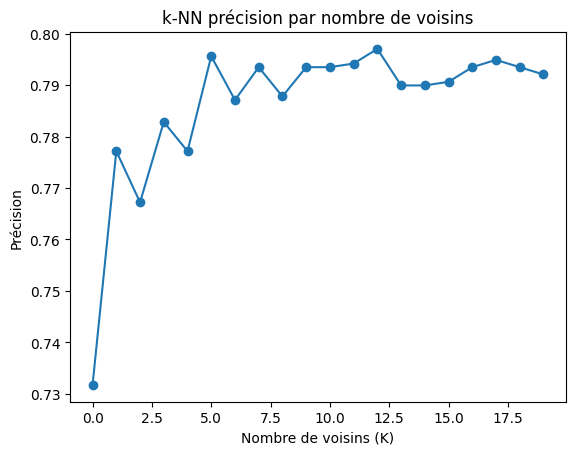

In [18]:
#Visualisation taux de précision (Test)

plt.plot(test_accuracy, 'o-')
plt.title('k-NN précision par nombre de voisins')
plt.xlabel('Nombre de voisins (K)')
plt.ylabel('Précision')
plt.show()

In [19]:
print("la meilleure valeur de K est: ",K)

la meilleure valeur de K est:  13


In [20]:
# Initialiser et entraîner le modèle de régression logistique
Knn = KNeighborsClassifier(n_neighbors=13)
Knn.fit(X_train, y_train)

# Faire des prédictions et évaluer la performance
y_pred_Knn = Knn.predict(X_test)

# Calcul des métriques
accuracy_Knn = accuracy_score(y_test, y_pred_Knn)
precision_Knn = precision_score(y_test, y_pred_Knn, average='weighted')
recall_Knn = recall_score(y_test, y_pred_Knn, average='weighted')
f1_Knn = f1_score(y_test, y_pred_Knn, average='weighted')

print(f"KNN - Accuracy: {accuracy_Knn * 100:.2f}%")
print(f"KNN - Precision: {precision_Knn * 100:.2f}%")
print(f"KNN - Recall: {recall_Knn * 100:.2f}%")
print(f"KNN - F1-Score: {f1_Knn * 100:.2f}%")

KNN - Accuracy: 79.70%
KNN - Precision: 78.39%
KNN - Recall: 79.70%
KNN - F1-Score: 78.22%


## Decision Tree

In [21]:
# Initialiser et entraîner le modèle Arbre de Décision
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Faire des prédictions et évaluer la performance
y_pred_dt = dt.predict(X_test)

# Calcul des métriques
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Arbre de Décision - Accuracy: {accuracy_dt * 100:.2f}%")
print(f"Arbre de Décision - Precision: {precision_dt * 100:.2f}%")
print(f"Arbre de Décision - Recall: {recall_dt * 100:.2f}%")
print(f"Arbre de Décision - F1-Score: {f1_dt * 100:.2f}%")


Arbre de Décision - Accuracy: 71.47%
Arbre de Décision - Precision: 71.96%
Arbre de Décision - Recall: 71.47%
Arbre de Décision - F1-Score: 71.70%


## Random Forest

In [22]:
# Initialiser et entraîner le modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Faire des prédictions et évaluer la performance
y_pred_rf = rf.predict(X_test)

# Calcul des métriques
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest - Accuracy: {accuracy_rf * 100:.2f}%")
print(f"Random Forest - Precision: {precision_rf * 100:.2f}%")
print(f"Random Forest - Recall: {recall_rf * 100:.2f}%")
print(f"Random Forest - F1-Score: {f1_rf * 100:.2f}%")

Random Forest - Accuracy: 79.28%
Random Forest - Precision: 77.98%
Random Forest - Recall: 79.28%
Random Forest - F1-Score: 78.09%


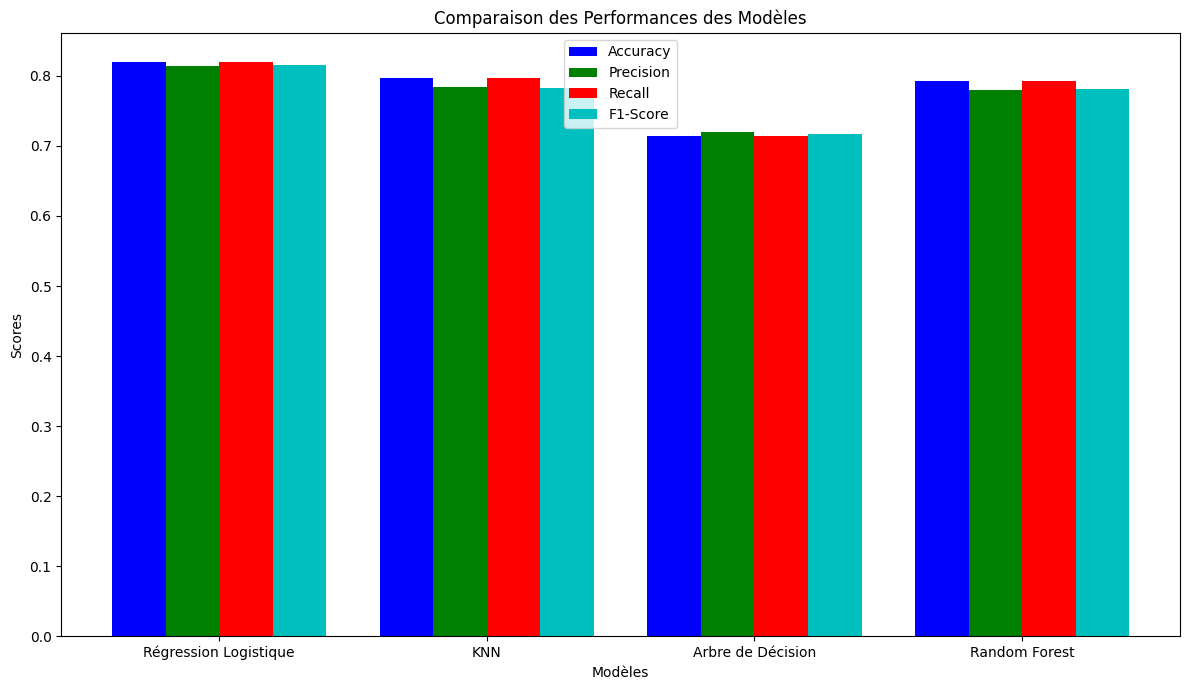

In [23]:
import matplotlib.pyplot as plt
import numpy as np
# Dictionnaire des modèles et de leurs métriques
models = ['Régression Logistique', 'KNN', 'Arbre de Décision', 'Random Forest']
accuracy = [accuracy_logreg, accuracy_Knn, accuracy_dt, accuracy_rf]
precision = [precision_logreg, precision_Knn, precision_dt, precision_rf]
recall = [recall_logreg, recall_Knn, recall_dt, recall_rf]
f1_score = [f1_logreg, f1_Knn, f1_dt, f1_rf]

# Organiser les données pour un bar plot
bar_width = 0.2
index = np.arange(len(models))

# Création du graphique avec des barres groupées
plt.figure(figsize=(12, 7))

# Tracer les barres pour chaque métrique
plt.bar(index, accuracy, bar_width, label='Accuracy', color='b')
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='g')
plt.bar(index + 2*bar_width, recall, bar_width, label='Recall', color='r')
plt.bar(index + 3*bar_width, f1_score, bar_width, label='F1-Score', color='c')

# Ajouter des labels et des titres
plt.xlabel('Modèles')
plt.ylabel('Scores')
plt.title('Comparaison des Performances des Modèles')
plt.xticks(index + 1.5*bar_width, models)
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()
